In [171]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [172]:
# Load the dataset 

data= pd.read_csv("data.csv")

In [173]:
# Look at the first 5 rows

data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [174]:
# Look at the last 5 rows

data.tail()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65
6018,6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0,NaN,2.50


In [175]:
# Check out the number of rows and columns.
data.shape

(6019, 14)

In [176]:
# Look at the information of all the features

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
Unnamed: 0           6019 non-null int64
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null object
Engine               5983 non-null object
Power                5983 non-null object
Seats                5977 non-null float64
New_Price            824 non-null object
Price                6019 non-null float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [177]:
# Check out the Dataset
data.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [178]:
# Check how many unique "Name" are there?

data['Name'].nunique()

1876

In [179]:
# Split the data in "Engine", "Mileage" and "Power" column.

eng = data["Engine"].str.split(" ", expand = True)
mil = data["Mileage"].str.split(" ", expand = True)
pov = data["Power"].str.split(" ", expand = True)


In [180]:
# Impute the above values into the column.

data['Engine']=eng
data['Mileage']=mil
data['Power']= pov

In [181]:
# Now look at the first 5 rows

data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,NaN,17.74


In [182]:
# Convert the datatype of following 4 rows from object to numeric.

data["Mileage"] = pd.to_numeric(data.Mileage, errors='coerce')
data["Engine"] = pd.to_numeric(data.Engine, errors='coerce')
data["Power"] = pd.to_numeric(data.Power, errors='coerce')
data["Seats"] = pd.to_numeric(data.Seats, errors='coerce')


In [183]:
# Now look at the information of all the features

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
Unnamed: 0           6019 non-null int64
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null float64
Engine               5983 non-null float64
Power                5876 non-null float64
Seats                5977 non-null float64
New_Price            824 non-null object
Price                6019 non-null float64
dtypes: float64(5), int64(3), object(6)
memory usage: 658.5+ KB


##### DATA CLEANING 

In [184]:
# Check for null Values

data.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                 143
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [185]:
# Imputing null values by taking the mean values.

data["Engine"].fillna(data["Engine"].mean(), inplace = True)
data["Power"].fillna(data["Power"].mean(), inplace = True)
data["Seats"].fillna(data["Seats"].mean(), inplace = True)
data["Mileage"].fillna(data["Mileage"].mean(), inplace = True)

In [186]:
# Now look at the information of all the features

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
Unnamed: 0           6019 non-null int64
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6019 non-null float64
Engine               6019 non-null float64
Power                6019 non-null float64
Seats                6019 non-null float64
New_Price            824 non-null object
Price                6019 non-null float64
dtypes: float64(5), int64(3), object(6)
memory usage: 658.5+ KB


In [187]:
# Check out the Dataset
data.describe()

,Unnamed: 0,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,18.134961,1621.276450,113.253050,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,4.581528,599.553865,53.231019,0.806012,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,72.000000,34.200000,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,15.170000,1198.000000,78.000000,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,18.150000,1493.000000,98.600000,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,21.100000,1969.000000,138.030000,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


In [188]:
# Drop the Columns "New_Price" and "Unnamed: 0"

cars = data.drop(['New_Price','Unnamed: 0'],axis=1)

In [189]:
# Now look at top 5 rows.

cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [190]:
# Now look at the information for all the columns.

cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6019 non-null float64
Engine               6019 non-null float64
Power                6019 non-null float64
Seats                6019 non-null float64
Price                6019 non-null float64
dtypes: float64(5), int64(2), object(5)
memory usage: 564.4+ KB


In [191]:
# Create a new column showing the number of years. 
year = 2020
cars['No_of_Years'] = cars['Year'].apply(lambda x :year - x)

In [192]:
# Look at the first 5 rows

cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,No_of_Years
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,10
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,5
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,9
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,8
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,7


In [193]:
# Converting Price in lakhs(Indian Curreny) to Canadian Dollars by using an exchange rate  .

cars['Price']=(cars['Price']*1824.504).round(2)

In [194]:
# Look at the top 5 rows .

cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,No_of_Years
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,3192.88,10
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,22806.30,5
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8210.27,9
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,10947.02,8
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,32366.70,7


In [195]:
# Split the "Name" column.

Nam = data["Name"].str.split(" ", expand = True)

In [196]:
# Create 2 columns which shows the Manufacturer name and Car name.

cars['Manufacture_Name']=Nam[0]
cars['Car_Name']=cars['Manufacture_Name'].str.cat(Nam[1],sep=' ')

In [197]:
# Look at the top 5 rows.

cars.head()


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,No_of_Years,Manufacture_Name,Car_Name
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,3192.88,10,Maruti,Maruti Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,22806.30,5,Hyundai,Hyundai Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8210.27,9,Honda,Honda Jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,10947.02,8,Maruti,Maruti Ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,32366.70,7,Audi,Audi A4


In [198]:
# Find the number of unique Manufacturers.

cars['Manufacture_Name'].nunique()

31

In [199]:
# Find the number of unique Car name
cars['Car_Name'].nunique()

218

##### DATA VISUALIZATIONS

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

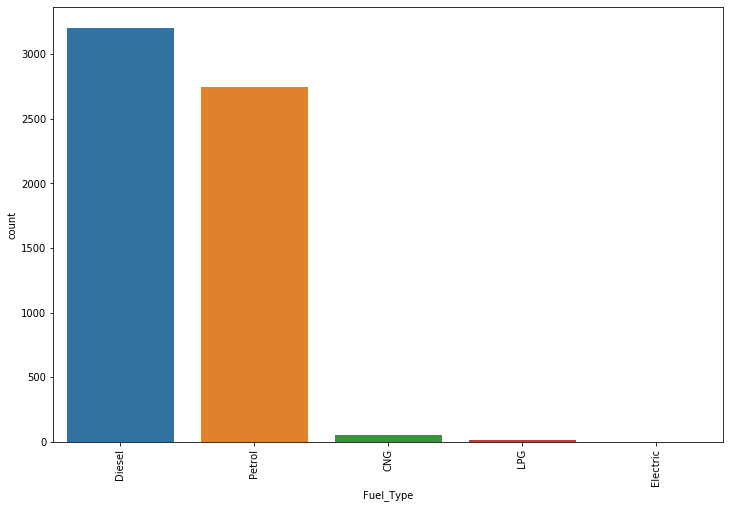

In [200]:
# Histogram for fuel type. 

plt.figure(figsize = (12, 8))
plot = sns.countplot(x = cars['Fuel_Type'], data = cars,order = cars['Fuel_Type'].value_counts(ascending=False).index)
plt.xticks(rotation = 90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

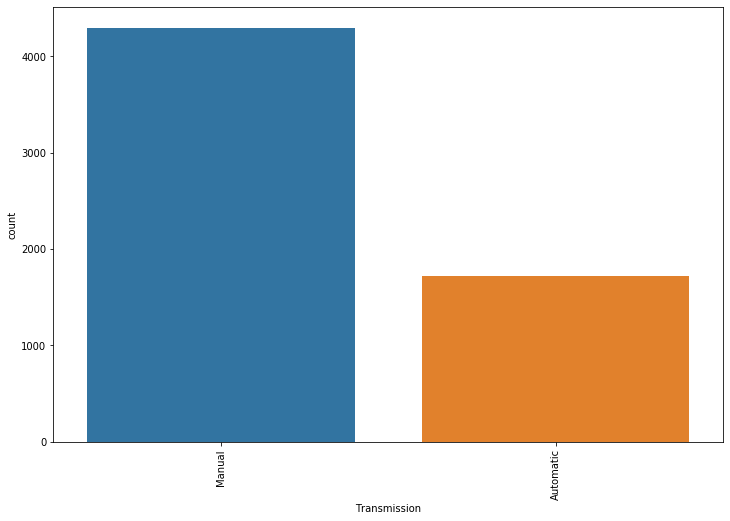

In [201]:
# Histogram showing different Transmission types

plt.figure(figsize = (12, 8))
plot = sns.countplot(x = cars['Transmission'], data = cars)
plt.xticks(rotation = 90)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

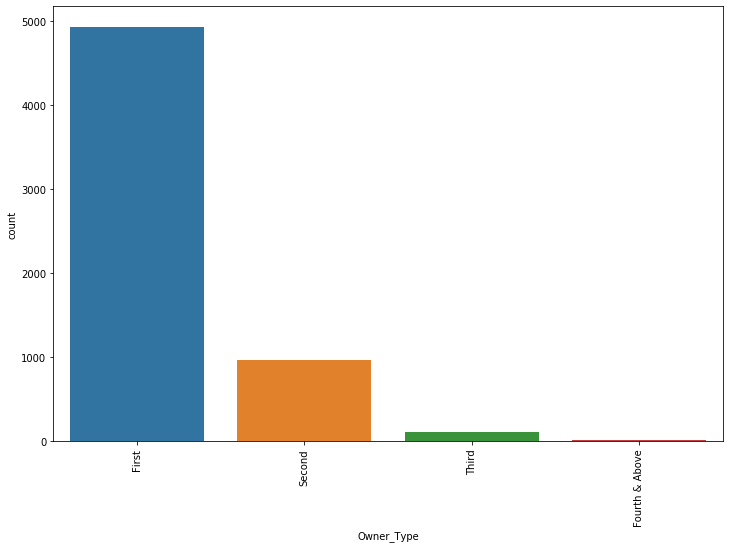

In [202]:
#  Histogram showing different Owner types

plt.figure(figsize = (12, 8))
plot = sns.countplot(x = cars['Owner_Type'], data = cars, order = cars['Owner_Type'].value_counts(ascending=False).index)
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

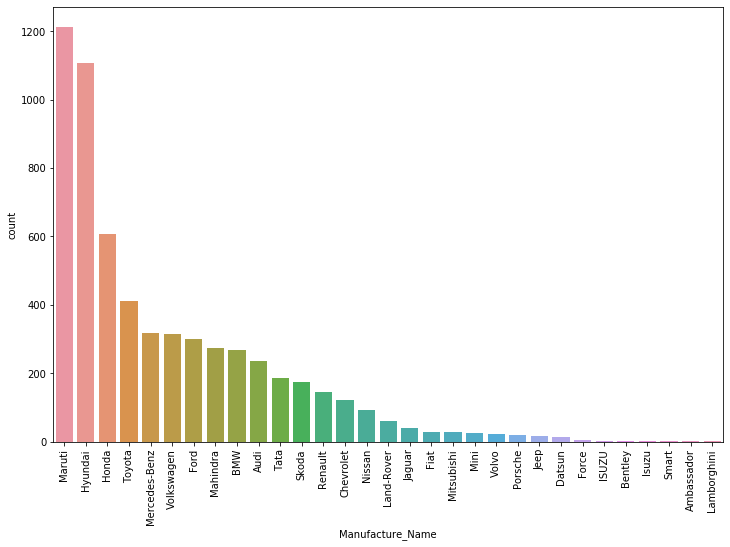

In [203]:
#  Histogram showing different Manufacture Names.
plt.figure(figsize = (12, 8))
plot = sns.countplot(x = cars['Manufacture_Name'], data = cars, order = cars['Manufacture_Name'].value_counts(ascending=False).index)
plt.xticks(rotation = 90)

In [204]:
# Unique Manufacture names.
print("Manufacture Names: " , cars['Manufacture_Name'].unique())

Manufacture Names:  ['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land-Rover' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra'
 'Ford' 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini'
 'Fiat' 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini']


In [205]:
cars['Manufacture_Name'].value_counts()

Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land-Rover         60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Bentley             1
Isuzu               1
Smart               1
Ambassador          1
Lamborghini         1
Name: Manufacture_Name, dtype: int64

In [206]:
# Replace "Isuzu" with "ISUZU"

cars['Manufacture_Name'].replace(to_replace =["Isuzu"],  
                            value ="ISUZU",inplace=True) 

In [207]:
# Print out the Values.

print("Manufacture Names: " , cars['Car_Name'].unique())

Manufacture Names:  ['Maruti Wagon' 'Hyundai Creta' 'Honda Jazz' 'Maruti Ertiga' 'Audi A4'
 'Hyundai EON' 'Nissan Micra' 'Toyota Innova' 'Volkswagen Vento'
 'Tata Indica' 'Maruti Ciaz' 'Honda City' 'Maruti Swift'
 'Land-Rover Range' 'Land-Rover Freelander' 'Mitsubishi Pajero'
 'Honda Amaze' 'Renault Duster' 'Mercedes-Benz New' 'BMW 3' 'Maruti S'
 'Audi A6' 'Hyundai i20' 'Maruti Alto' 'Honda WRV' 'Toyota Corolla'
 'Mahindra Ssangyong' 'Maruti Vitara' 'Mahindra KUV'
 'Mercedes-Benz M-Class' 'Volkswagen Polo' 'Tata Nano' 'Hyundai Elantra'
 'Hyundai Xcent' 'Mahindra Thar' 'Hyundai Grand' 'Renault KWID'
 'Hyundai i10' 'Nissan X-Trail' 'Maruti Zen' 'Ford Figo'
 'Mercedes-Benz C-Class' 'Porsche Cayenne' 'Mahindra XUV500'
 'Nissan Terrano' 'Honda Brio' 'Ford Fiesta' 'Hyundai Santro' 'Tata Zest'
 'Maruti Ritz' 'BMW 5' 'Toyota Fortuner' 'Ford Ecosport' 'Hyundai Verna'
 'Datsun GO' 'Maruti Omni' 'Toyota Etios' 'Jaguar XF' 'Maruti Eeco'
 'Honda Civic' 'Volvo V40' 'Mercedes-Benz B' 'Mahindra Scorpi

In [208]:
# Count of Unique Manufacture names.
print(" Count of Unique Manufacture Names: " , cars['Manufacture_Name'].nunique())

 Count of Unique Manufacture Names:  30


In [209]:
cars['Manufacture_Name'].value_counts()

Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land-Rover         60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               3
Bentley             1
Smart               1
Ambassador          1
Lamborghini         1
Name: Manufacture_Name, dtype: int64

In [210]:
cars['Car_Name']=cars['Manufacture_Name'].str.cat(Nam[1],sep=' ')

In [211]:
cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,No_of_Years,Manufacture_Name,Car_Name
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,3192.88,10,Maruti,Maruti Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,22806.30,5,Hyundai,Hyundai Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8210.27,9,Honda,Honda Jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,10947.02,8,Maruti,Maruti Ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,32366.70,7,Audi,Audi A4


In [212]:
# Count of Unique Car names.
print(" Count of Unique Car Names: " , cars['Car_Name'].nunique())

 Count of Unique Car Names:  218


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

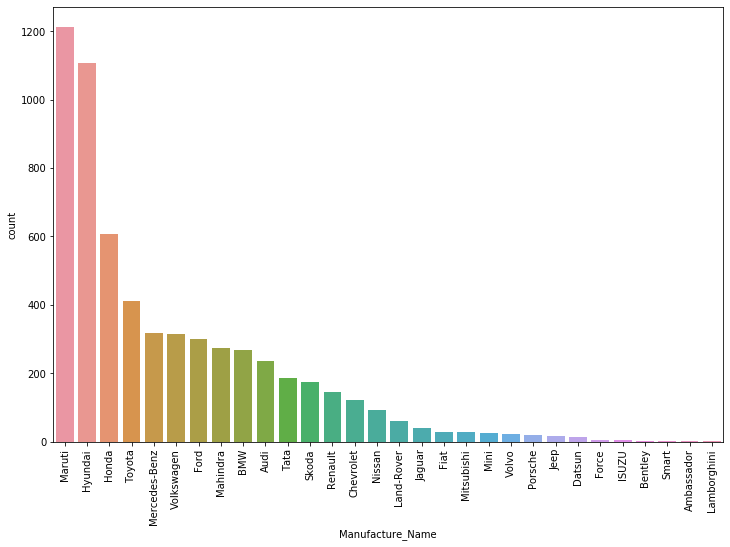

In [213]:
#  Histogram showing different Manufacture Names
plt.figure(figsize = (12, 8))
plot = sns.countplot(x = cars['Manufacture_Name'], data = cars, order = cars['Manufacture_Name'].value_counts().index)
plt.xticks(rotation = 90)

In [214]:
# Description about the Price Column
print(cars['Price'].describe(percentiles = [0.25,0.50,0.75,0.80,0.90,1]))

count      6019.000000
mean      17295.327868
std       20412.399578
min         802.780000
25%        6385.760000
50%       10290.200000
75%       18153.810000
80%       22806.300000
90%       41051.340000
100%     291920.640000
max      291920.640000
Name: Price, dtype: float64


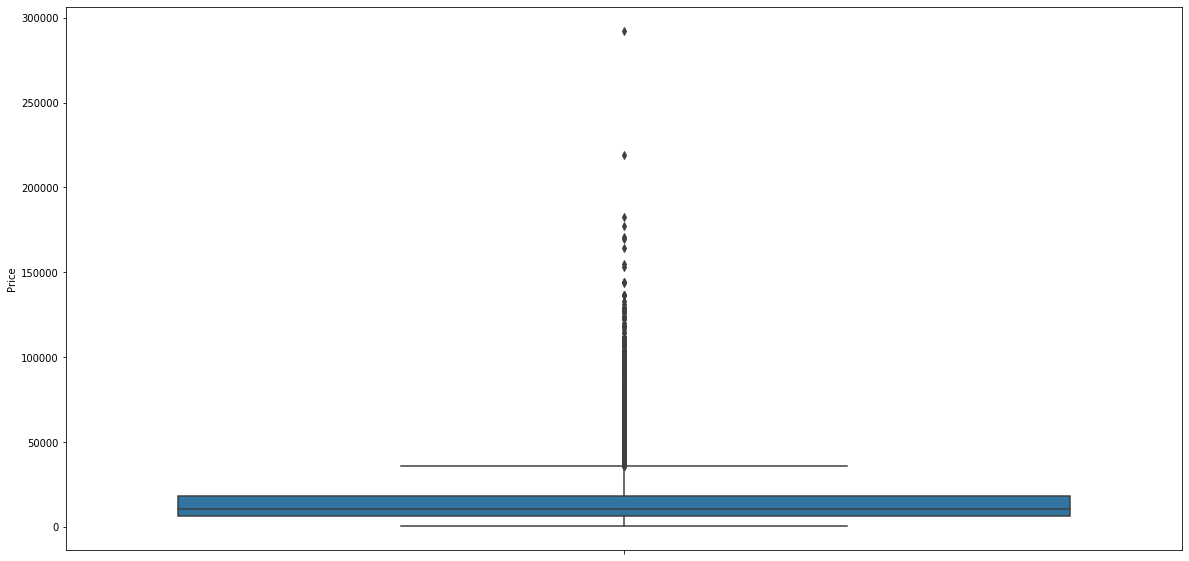

In [215]:
# Box Plot For Price feature
plt.figure(figsize=(20,10))
plt.ylim()
sns.boxplot(y=cars['Price'])

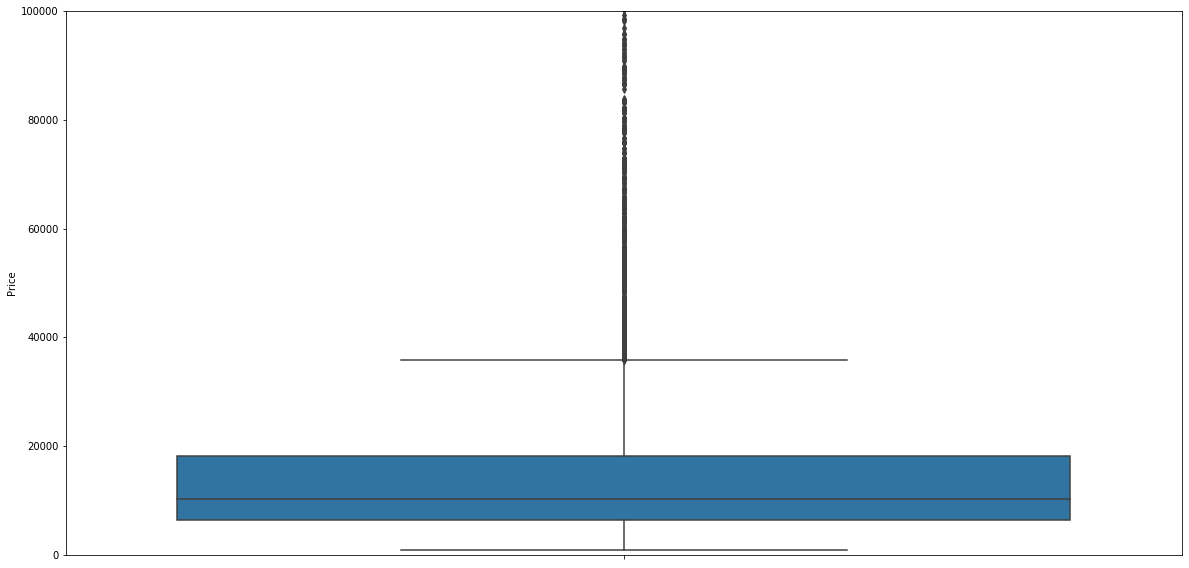

In [216]:
# Box Plot For Price feature with y axis range 0 to 100000
plt.figure(figsize=(20,10))
plt.ylim(0,100000)
sns.boxplot(y=cars['Price'])

In [217]:
# Look at the top 5 rows
cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,No_of_Years,Manufacture_Name,Car_Name
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,3192.88,10,Maruti,Maruti Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,22806.30,5,Hyundai,Hyundai Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8210.27,9,Honda,Honda Jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,10947.02,8,Maruti,Maruti Ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,32366.70,7,Audi,Audi A4


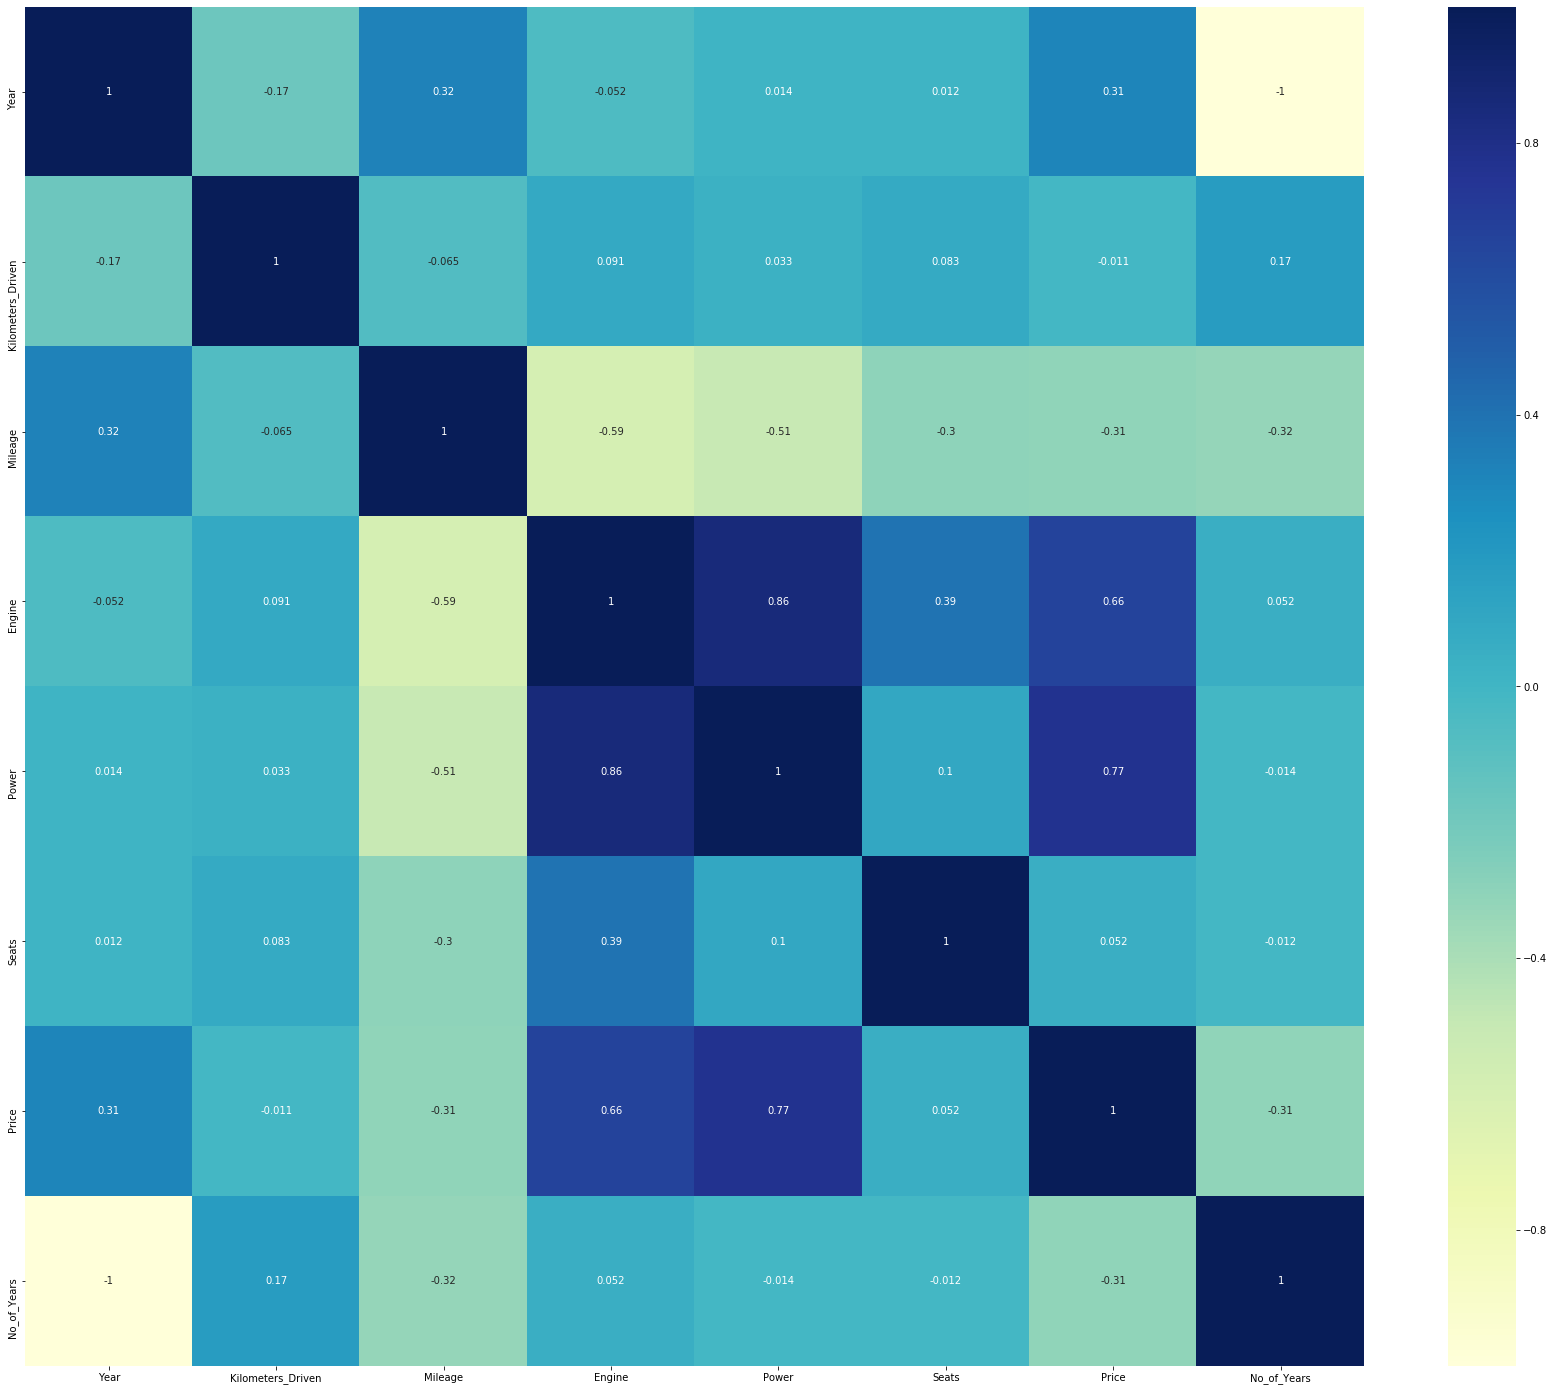

In [218]:
# Correlation Heat map
plt.figure(figsize = (30, 25))
sns.heatmap(cars.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [219]:
# Correlation values.
cars.corr()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,No_of_Years
Year,1.000000,-0.173048,0.321534,-0.051712,0.013895,0.012204,0.305327,-1.000000
Kilometers_Driven,-0.173048,1.000000,-0.065253,0.091029,0.033419,0.083072,-0.011493,0.173048
Mileage,0.321534,-0.065253,1.000000,-0.588354,-0.506801,-0.303086,-0.306588,-0.321534
Engine,-0.051712,0.091029,-0.588354,1.000000,0.859020,0.393087,0.657118,0.051712
Power,0.013895,0.033419,-0.506801,0.859020,1.000000,0.100200,0.767331,-0.013895
Seats,0.012204,0.083072,-0.303086,0.393087,0.100200,1.000000,0.052118,-0.012204
Price,0.305327,-0.011493,-0.306588,0.657118,0.767331,0.052118,1.000000,-0.305327
No_of_Years,-1.000000,0.173048,-0.321534,0.051712,-0.013895,-0.012204,-0.305327,1.000000


In [220]:
# Showing the features that best correlates to the price column.
cars.corr().loc[:,'Price'].abs().sort_values(ascending=False)

Price                1.000000
Power                0.767331
Engine               0.657118
Mileage              0.306588
No_of_Years          0.305327
Year                 0.305327
Seats                0.052118
Kilometers_Driven    0.011493
Name: Price, dtype: float64

In [221]:
# Drop columns which are of least importance.
cars_new = cars.drop(['Name','Location','Year','Manufacture_Name'],axis=1)

In [222]:
cars_new.shape

(6019, 11)

In [223]:
# Convert the categorical values into dummies using the get_dummies function  
df=pd.get_dummies(cars_new['Fuel_Type'])
cars_new=pd.concat([cars_new,df.iloc[:,:-1]],axis=1)
cars_new.drop(['Fuel_Type'],axis=1,inplace=True)
df=pd.get_dummies(cars_new['Transmission'])
cars_new=pd.concat([cars_new,df.iloc[:,:-1]],axis=1)
cars_new.drop(['Transmission'],axis=1,inplace=True)
df=pd.get_dummies(cars_new['Owner_Type'])
cars_new=pd.concat([cars_new,df.iloc[:,:-1]],axis=1)
cars_new.drop(['Owner_Type'],axis=1,inplace=True)
df=pd.get_dummies(cars_new['Car_Name'])
cars_new=pd.concat([cars_new,df.iloc[:,:-1]],axis=1)
cars_new.drop(['Car_Name'],axis=1,inplace=True)

In [224]:
cars_new.shape

(6019, 232)

# Model Building 


In [225]:
# Look at the data
cars_new

,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,No_of_Years,CNG,Diesel,Electric,...,Volkswagen CrossPolo,Volkswagen Jetta,Volkswagen Passat,Volkswagen Polo,Volkswagen Tiguan,Volkswagen Vento,Volvo S60,Volvo S80,Volvo V40,Volvo XC60
0,72000,26.60,998.0,58.16,5.0,3192.88,10,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,41000,19.67,1582.0,126.20,5.0,22806.30,5,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,46000,18.20,1199.0,88.70,5.0,8210.27,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,87000,20.77,1248.0,88.76,7.0,10947.02,8,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,40670,15.20,1968.0,140.80,5.0,32366.70,7,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,27365,28.40,1248.0,74.00,5.0,8666.39,6,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6015,100000,24.40,1120.0,71.00,5.0,7298.02,5,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6016,55000,14.00,2498.0,112.00,8.0,5291.06,8,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6017,46000,18.90,998.0,67.10,5.0,4834.94,7,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [226]:
cars_new.columns

Index(['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price',
       'No_of_Years', 'CNG', 'Diesel', 'Electric',
       ...
       'Volkswagen CrossPolo', 'Volkswagen Jetta', 'Volkswagen Passat',
       'Volkswagen Polo', 'Volkswagen Tiguan', 'Volkswagen Vento', 'Volvo S60',
       'Volvo S80', 'Volvo V40', 'Volvo XC60'],
      dtype='object', length=232)

In [227]:
X = cars_new.drop('Price',axis=1)
Y = cars_new['Price']


In [228]:
X.head()

,Kilometers_Driven,Mileage,Engine,Power,Seats,No_of_Years,CNG,Diesel,Electric,LPG,...,Volkswagen CrossPolo,Volkswagen Jetta,Volkswagen Passat,Volkswagen Polo,Volkswagen Tiguan,Volkswagen Vento,Volvo S60,Volvo S80,Volvo V40,Volvo XC60
0,72000,26.60,998.0,58.16,5.0,10,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,41000,19.67,1582.0,126.20,5.0,5,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,46000,18.20,1199.0,88.70,5.0,9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,87000,20.77,1248.0,88.76,7.0,8,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,40670,15.20,1968.0,140.80,5.0,7,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [229]:
Y.head()

0     3192.88
1    22806.30
2     8210.27
3    10947.02
4    32366.70
Name: Price, dtype: float64

# Splitting the data with a test size of 0.2

In [230]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2, random_state = 0)

In [231]:
X_train

,Kilometers_Driven,Mileage,Engine,Power,Seats,No_of_Years,CNG,Diesel,Electric,LPG,...,Volkswagen CrossPolo,Volkswagen Jetta,Volkswagen Passat,Volkswagen Polo,Volkswagen Tiguan,Volkswagen Vento,Volvo S60,Volvo S80,Volvo V40,Volvo XC60
3509,24153,22.54,1396.0,88.73,5.0,3,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3332,35000,17.21,1493.0,100.00,7.0,7,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5383,92000,16.10,1405.0,70.00,5.0,15,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1891,62000,17.80,1248.0,75.00,5.0,6,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5757,31000,13.68,2393.0,147.80,7.0,3,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,67000,18.49,1493.0,100.00,7.0,4,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3264,147350,12.99,2494.0,100.60,8.0,14,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1653,62000,12.05,2179.0,120.00,8.0,8,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2607,50000,22.00,1582.0,126.20,5.0,3,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [232]:
y_train

3509    16748.95
3332     6367.52
5383     2006.95
1891     6841.89
5757    30925.34
          ...   
4931    11494.38
3264     9031.29
1653    11403.15
2607    20981.80
2732     7845.37
Name: Price, Length: 4815, dtype: float64

In [233]:
X_test

,Kilometers_Driven,Mileage,Engine,Power,Seats,No_of_Years,CNG,Diesel,Electric,LPG,...,Volkswagen CrossPolo,Volkswagen Jetta,Volkswagen Passat,Volkswagen Polo,Volkswagen Tiguan,Volkswagen Vento,Volvo S60,Volvo S80,Volvo V40,Volvo XC60
5150,62000,15.10,2179.0,140.00000,7.0,6,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2164,86514,17.80,1248.0,113.25305,5.0,10,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1136,67200,15.04,1598.0,103.60000,5.0,8,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5641,45840,11.40,2953.0,153.86000,7.0,8,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1515,29219,12.99,2494.0,100.60000,8.0,3,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5899,65000,19.30,1248.0,73.90000,5.0,7,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4139,43477,15.00,2143.0,204.00000,5.0,3,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
728,32000,15.00,1248.0,88.50000,5.0,3,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3619,54257,17.40,1497.0,117.30000,5.0,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [234]:
y_test

5150    13227.65
2164     7754.14
1136     7115.57
5641    15344.08
1515    24594.31
          ...   
5899     9104.27
4139    69604.83
728     15508.28
3619    11403.15
3828     7060.83
Name: Price, Length: 1204, dtype: float64

# Linear Regression Model 

In [235]:

from sklearn.linear_model import LinearRegression  
reg = LinearRegression()
reg = reg.fit(X_train,y_train)
train_prediction = reg.predict(X_train)
test_prediction = reg.predict(X_test)

In [236]:
from sklearn.metrics import r2_score
r2_score(y_test,test_prediction)

-88170578671.3808

In [237]:
MAE_train=np.mean(abs(y_train-train_prediction))/np.mean(y_train)
print("Tree on train set MAE%:", round(MAE_train*100,1))

MAE_test=np.mean(abs(y_test-test_prediction))/np.mean(y_test)
print("Tree on test set MAE%:", round(MAE_test*100,1))

Tree on train set MAE%: 24.6
Tree on test set MAE%: 1027326.3


In [238]:
y_test

5150    13227.65
2164     7754.14
1136     7115.57
5641    15344.08
1515    24594.31
          ...   
5899     9104.27
4139    69604.83
728     15508.28
3619    11403.15
3828     7060.83
Name: Price, Length: 1204, dtype: float64

In [239]:
test_prediction

array([17751.05346674,  6558.49236168,  5778.54496561, ...,
       17214.730327  , 13332.43877874, 12280.2618343 ])

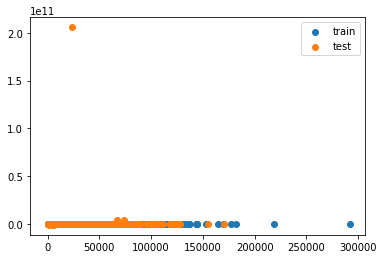

In [240]:
# Create a scatter plot with train and test

plt.scatter(y_train, train_prediction, label='train')
plt.scatter(y_test, test_prediction, label='test')
plt.legend()
plt.show()

# K-Neighbors Regression Model

In [241]:

from sklearn.neighbors import KNeighborsRegressor
k_reg=KNeighborsRegressor()
k_reg = k_reg.fit(X_train,y_train)
train_prediction = k_reg.predict(X_train)
test_prediction=k_reg.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,test_prediction)

0.5388718334871534

In [242]:
MAE_train=np.mean(abs(y_train-train_prediction))/np.mean(y_train)
print("Tree on train set MAE%:", round(MAE_train*100,1))

MAE_test=np.mean(abs(y_test-test_prediction))/np.mean(y_test)
print("Tree on test set MAE%:", round(MAE_test*100,1))

Tree on train set MAE%: 34.2
Tree on test set MAE%: 42.1


In [243]:
y_test

5150    13227.65
2164     7754.14
1136     7115.57
5641    15344.08
1515    24594.31
          ...   
5899     9104.27
4139    69604.83
728     15508.28
3619    11403.15
3828     7060.83
Name: Price, Length: 1204, dtype: float64

In [244]:
test_prediction

array([31899.628,  8794.108,  8885.336, ...,  8812.354, 14128.958,
        7090.022])

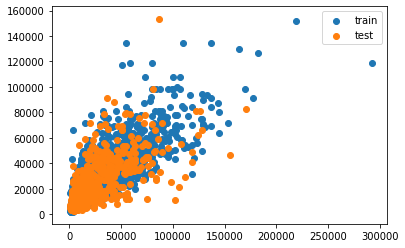

In [245]:
# Create a scatter plot with train and test 

plt.scatter(y_train, train_prediction, label='train')
plt.scatter(y_test, test_prediction, label='test')
plt.legend()
plt.show()

# Decision Tree Regression Model

In [246]:

from sklearn.tree import DecisionTreeRegressor
dec_reg = DecisionTreeRegressor()
dec_reg.fit(X_train,y_train)
train_prediction = dec_reg.predict(X_train)
test_prediction=dec_reg.predict(X_test)
r2_score(y_test,test_prediction)

0.8326270662234487

In [247]:
MAE_train=np.mean(abs(y_train-train_prediction))/np.mean(y_train)
print("Tree on train set MAE%:", round(MAE_train*100,1))

MAE_test=np.mean(abs(y_test-test_prediction))/np.mean(y_test)
print("Tree on test set MAE%:", round(MAE_test*100,1))

Tree on train set MAE%: 0.0
Tree on test set MAE%: 20.5


In [248]:
y_test

5150    13227.65
2164     7754.14
1136     7115.57
5641    15344.08
1515    24594.31
          ...   
5899     9104.27
4139    69604.83
728     15508.28
3619    11403.15
3828     7060.83
Name: Price, Length: 1204, dtype: float64

In [249]:
test_prediction

array([14176.4 ,  6294.54,  6933.12, ..., 15052.16, 10034.77,  7845.37])

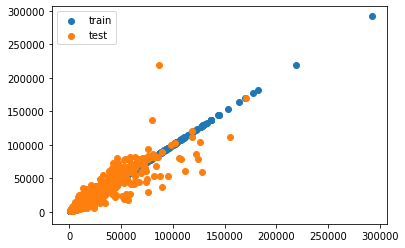

In [250]:
# Create a scatter plot with train and test 
plt.scatter(y_train, train_prediction, label='train')
plt.scatter(y_test, test_prediction, label='test')
plt.legend()
plt.show()

# Random Forest Model

In [251]:

from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=200)
rf_reg.fit(X_train,y_train)
train_prediction = rf_reg.predict(X_train)
test_prediction=rf_reg.predict(X_test)
r2_score(y_test,test_prediction)

0.9178452523792107

In [252]:
MAE_train=np.mean(abs(y_train-train_prediction))/np.mean(y_train)
print("Tree on train set MAE%:", round(MAE_train*100,1))

MAE_test=np.mean(abs(y_test-test_prediction))/np.mean(y_test)
print("Tree on test set MAE%:", round(MAE_test*100,1))

Tree on train set MAE%: 6.0
Tree on test set MAE%: 15.8


In [253]:
y_test

5150    13227.65
2164     7754.14
1136     7115.57
5641    15344.08
1515    24594.31
          ...   
5899     9104.27
4139    69604.83
728     15508.28
3619    11403.15
3828     7060.83
Name: Price, Length: 1204, dtype: float64

In [254]:
test_prediction

array([14445.877825,  6032.53985 ,  7237.07975 , ..., 14436.84445 ,
       10411.00778 ,  6735.7032  ])

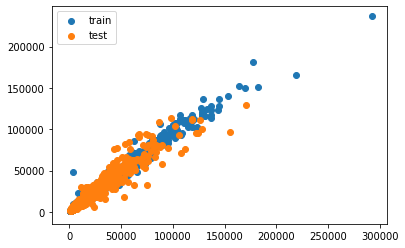

In [255]:
# Create a scatter plot with train and test 
plt.scatter(y_train, train_prediction, label='train')
plt.scatter(y_test, test_prediction, label='test')
plt.legend()
plt.show()

#  Gradient Boosted Regression Model 

In [256]:

from sklearn.ensemble import GradientBoostingRegressor
gb_reg = GradientBoostingRegressor(max_features=5,
                                learning_rate=0.01,
                                n_estimators=200,
                                random_state=99)
gb_reg.fit(X_train,y_train)
train_prediction = gb_reg.predict(X_train)
test_prediction=gb_reg.predict(X_test)
r2_score(y_test,test_prediction)


0.3845285516644992

In [257]:
MAE_train=np.mean(abs(y_train-train_prediction))/np.mean(y_train)
print("Tree on train set MAE%:", round(MAE_train*100,1))

MAE_test=np.mean(abs(y_test-test_prediction))/np.mean(y_test)
print("Tree on test set MAE%:", round(MAE_test*100,1))

Tree on train set MAE%: 55.7
Tree on test set MAE%: 54.3


In [258]:
y_test

5150    13227.65
2164     7754.14
1136     7115.57
5641    15344.08
1515    24594.31
          ...   
5899     9104.27
4139    69604.83
728     15508.28
3619    11403.15
3828     7060.83
Name: Price, Length: 1204, dtype: float64

In [259]:
test_prediction

array([16957.11155751, 13275.92638788, 13147.7337995 , ...,
       15939.77752713, 13697.73009758, 14182.79827094])

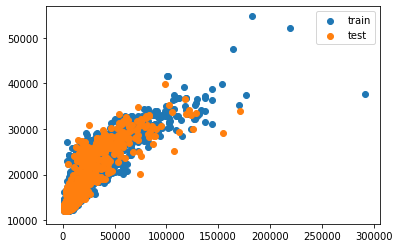

In [260]:
# Create a scatter plot with train and test
plt.scatter(y_train, train_prediction, label='train')
plt.scatter(y_test, test_prediction, label='test')
plt.legend()
plt.show()

# Ridge Regression Model

In [261]:

from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)
clf.fit(X_train,y_train)
train_prediction = clf.predict(X_train)
test_prediction=clf.predict(X_test)
r2_score(y_test,test_prediction)

0.8283128698761699

In [262]:
MAE_train=np.mean(abs(y_train-train_prediction))/np.mean(y_train)
print("Tree on train set MAE%:", round(MAE_train*100,1))

MAE_test=np.mean(abs(y_test-test_prediction))/np.mean(y_test)
print("Tree on test set MAE%:", round(MAE_test*100,1))

Tree on train set MAE%: 26.4
Tree on test set MAE%: 26.3


In [263]:
y_test

5150    13227.65
2164     7754.14
1136     7115.57
5641    15344.08
1515    24594.31
          ...   
5899     9104.27
4139    69604.83
728     15508.28
3619    11403.15
3828     7060.83
Name: Price, Length: 1204, dtype: float64

In [264]:
test_prediction

array([17795.78730412,  9721.61442514,  5451.84529779, ...,
       17381.79956146, 13584.41460736, 12211.6263996 ])

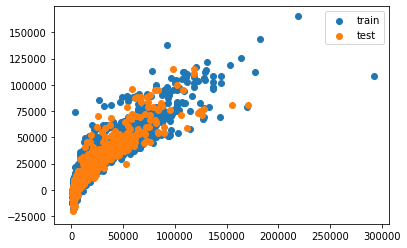

In [265]:
# Create a scatter plot with train and test 
plt.scatter(y_train, train_prediction, label='train')
plt.scatter(y_test, test_prediction, label='test')
plt.legend()
plt.show()

# Lasso Regression Model

In [280]:

from sklearn import linear_model
las = linear_model.Lasso(alpha=1)
las.fit(X_train,y_train)
train_prediction = las.predict(X_train)
test_prediction=las.predict(X_test)
r2_score(y_test,test_prediction)

0.8214717605420288

In [281]:
MAE_train=np.mean(abs(y_train-train_prediction))/np.mean(y_train)
print("Tree on train set MAE%:", round(MAE_train*100,1))

MAE_test=np.mean(abs(y_test-test_prediction))/np.mean(y_test)
print("Tree on test set MAE%:", round(MAE_test*100,1))

Tree on train set MAE%: 24.8
Tree on test set MAE%: 25.9


In [282]:
y_test

5150    13227.65
2164     7754.14
1136     7115.57
5641    15344.08
1515    24594.31
          ...   
5899     9104.27
4139    69604.83
728     15508.28
3619    11403.15
3828     7060.83
Name: Price, Length: 1204, dtype: float64

In [283]:
test_prediction

array([17800.7073531 ,  7716.75114596,  5708.71676163, ...,
       17884.25874378, 13334.48647267, 12100.63232083])

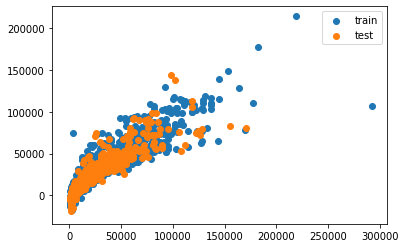

In [284]:
# Create a scatter plot with train and test
plt.scatter(y_train, train_prediction, label='train')
plt.scatter(y_test, test_prediction, label='test')
plt.legend()
plt.show()